#### Task 1: Exploratory Data Analysis (EDA) and Business Insights

### EDA Process

 There is no null values in the Dataset <br>
 No duplicate <br>
 No outliers 

### 1. Customer dataset contains column name 
CustomerID	<br>CustomerName<br>	Region<br>	SignupDate : data type object converted to datetime

### 2. Products dataset contains column name 
ProductID<br>	ProductName<br>	Category<br>	Price<br>
### 3. Transactions dataset contains column name like
TransactionID<br>	CustomerID<br>	ProductID<br>	TransactionDate<br>	Quantity<br>	TotalValue<br>	Price<br>

Column id and Product id later on used for merging dataset

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [99]:
print("Customers Dataset:")
customers.head()

Customers Dataset:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [100]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [101]:
customers.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [102]:
# converting 'SignupDate' to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

In [103]:
# checking for duplicates values

print("\nDuplicate Rows in Customers Dataset:")
print(customers.duplicated().sum())



Duplicate Rows in Customers Dataset:
0


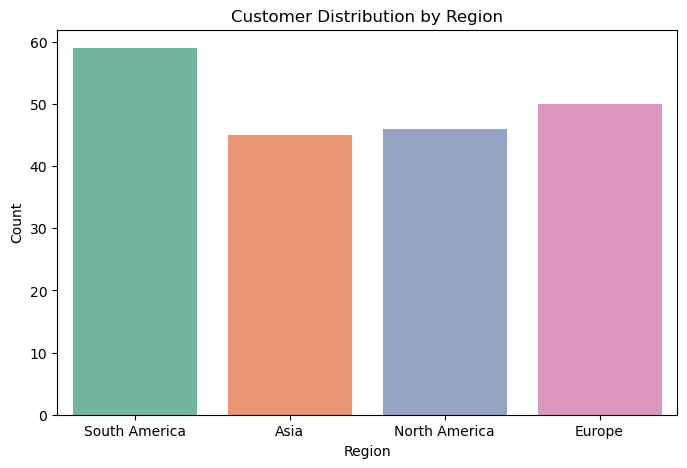

In [104]:
# Univariate Analysis

# count of distribution of the categorical variable 'Region'
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x='Region', palette='Set2')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

In [105]:
# analysis on 'SignupDate' 

customers['SignupYear'] = customers['SignupDate'].dt.year
customers['SignupMonth'] = customers['SignupDate'].dt.month
customers['SignupDay'] = customers['SignupDate'].dt.day


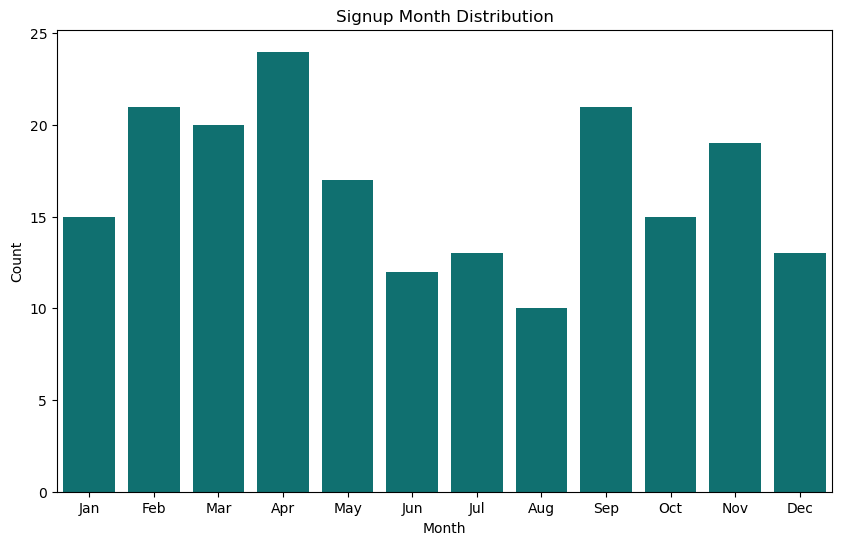

In [106]:
# Plot the distribution of signup months

plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='SignupMonth', color='teal')
plt.title('Signup Month Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

In [61]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [62]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [63]:
# Descriptive statistics for Products dataset
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [64]:
# checking for missing values and duplicates

print("\nDuplicate Rows in Products Dataset:")
print(products.duplicated().sum())



Duplicate Rows in Products Dataset:
0


In [107]:
#  Univariate Analysis

# For categorical columns: 'ProductID', 'ProductName', 'Category'
print("\nUnique Values and Distribution for Categorical Columns:")

# Check unique values in 'Category'
print(products['Category'].value_counts())



Unique Values and Distribution for Categorical Columns:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


C:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


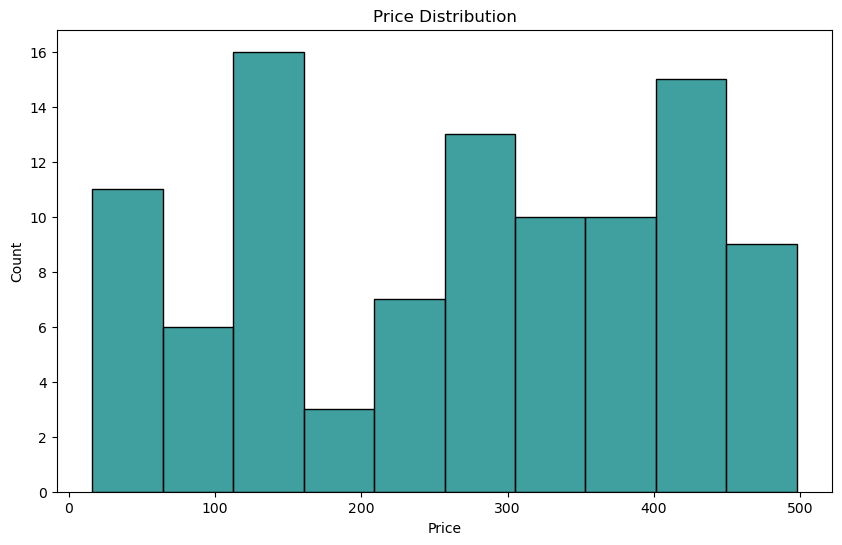

In [108]:
# Plot the distribution of 'Price'
plt.figure(figsize=(10, 6))
sns.histplot(products['Price'], color='teal', bins=10)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [67]:
print("\nMode of Category Column:")
print(products['Category'].mode()[0])


Mode of Category Column:
Books


In [68]:
print("\nTransactions Dataset:")
transactions.head()


Transactions Dataset:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [69]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [79]:
customers.describe()

,SignupDate,SignupYear,SignupMonth,SignupDay
count,200,200.000000,200.000000,200.000000
mean,2023-07-19 08:31:12,2023.075000,6.225000,14.510000
min,2022-01-22 00:00:00,2022.000000,1.000000,1.000000
25%,2022-09-26 12:00:00,2022.000000,3.000000,7.000000
50%,2023-08-31 12:00:00,2023.000000,6.000000,14.000000
75%,2024-04-12 12:00:00,2024.000000,9.000000,21.000000
max,2024-12-28 00:00:00,2024.000000,12.000000,31.000000
std,NaN,0.844358,3.486424,8.056952


In [80]:
# Convert 'TransactionDate' to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


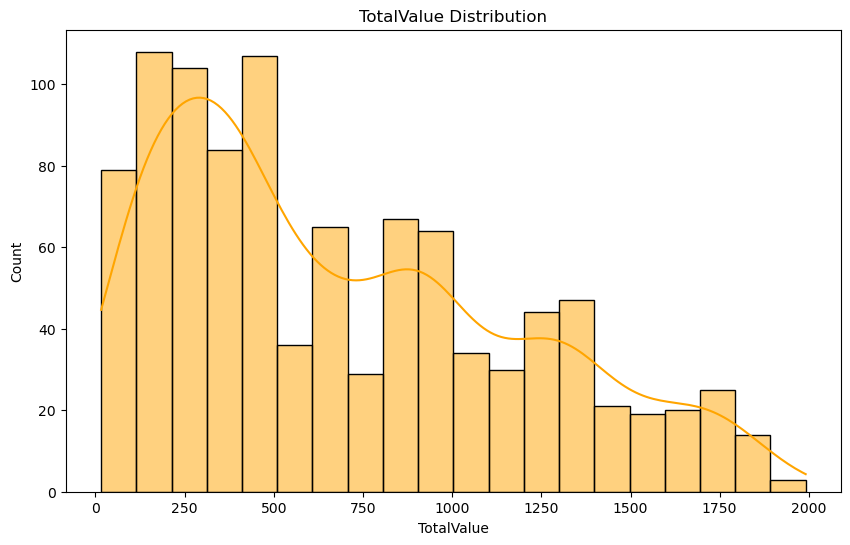

In [96]:
# Plot the distribution of 'TotalValue'
plt.figure(figsize=(10, 6))
sns.histplot(transactions['TotalValue'], kde=True, color='orange', bins=20)
plt.title('TotalValue Distribution')
plt.xlabel('TotalValue')
plt.ylabel('Count')
plt.show()

Now i am going to merge the dataset so that we can able to find the best Business insights
y purchases.

In [78]:
df_merge = pd.merge(transactions, customers, on='CustomerID', how='inner')
df_merge = pd.merge(df_merge, products, on='ProductID', how='inner')

In [114]:
df_merge

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,SignupYear,SignupMonth,SignupDay,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,2022,12,3,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,2024,9,4,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,2024,4,4,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,2024,4,11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,2022,3,15,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00630,C0031,P093,2024-10-08 23:58:14,2,609.88,304.94,Tina Miller,South America,2024-04-11,2024,4,11,TechPro Vase,Home Decor,304.94
996,T00672,C0165,P044,2024-07-28 00:09:49,4,75.28,18.82,Juan Mcdaniel,South America,2022-04-09,2022,4,9,ActiveWear Running Shoes,Clothing,18.82
997,T00711,C0165,P044,2024-06-11 15:51:14,4,75.28,18.82,Juan Mcdaniel,South America,2022-04-09,2022,4,9,ActiveWear Running Shoes,Clothing,18.82
998,T00878,C0165,P044,2024-09-24 21:15:21,3,56.46,18.82,Juan Mcdaniel,South America,2022-04-09,2022,4,9,ActiveWear Running Shoes,Clothing,18.82


In [118]:
# top 7 most bought products
top_7_products = (
    df_merge.groupby('ProductID')['Quantity']
    .sum()
    .reset_index()
    .sort_values(by='Quantity', ascending=False)
    .merge(products, on='ProductID')
    .head(7)
)

print("Top 7 Most Bought Products:")
print(top_5_products[['ProductID', 'ProductName', 'Category', 'Quantity']])


Top 7 Most Bought Products:
  ProductID            ProductName     Category  Quantity
0      P059        SoundWave Jeans     Clothing        46
1      P054     SoundWave Cookbook        Books        46
2      P029     TechPro Headphones  Electronics        45
3      P079         ActiveWear Rug   Home Decor        43
4      P061    HomeSense Desk Lamp   Home Decor        43
5      P057  ActiveWear Smartphone  Electronics        43
6      P048       TechPro Cookbook        Books        43


In [117]:
# most bought categories
most_bought_categories = (
    df_merge.groupby('Category')['Quantity']
    .sum()
    .reset_index()
    .sort_values(by='Quantity', ascending=False)
)

# Print the top categories
print("Most Bought Categories:")
print(most_bought_categories)


Most Bought Categories:
      Category  Quantity
0        Books       681
3   Home Decor       639
2  Electronics       627
1     Clothing       590


In [125]:
most_expensive = df_merge.loc[df_merge['Price_y'].idxmax()]

print("Most Expensive Product:")
most_expensive[['ProductID', 'ProductName', 'Category', 'Price_y']]

Most Expensive Product:


ProductID                  P075
ProductName    TechPro Textbook
Category                  Books
Price_y                  497.76
Name: 240, dtype: object

In [126]:
least_expensive = df_merge.loc[df_merge['Price_y'].idxmin()]

print("\nLeast Expensive Product:")
least_expensive[['ProductID', 'ProductName', 'Category', 'Price_y']]


Least Expensive Product:


ProductID                      P056
ProductName    SoundWave Smartwatch
Category                Electronics
Price_y                       16.08
Name: 751, dtype: object

In [131]:
# average cost for each Category
avg_cost_per_product = (
    df_merge.groupby('Category')['Price_y']
    .mean()
    .reset_index()
    .sort_values(by='Price_y', ascending=False)
)

print("\nAverage Cost for Each Category:")
avg_cost_per_product


Average Cost for Each Category:


,Category,Price_y
2,Electronics,288.722008
1,Clothing,283.104254
0,Books,280.526222
3,Home Decor,237.616250
